# Análise Histórica do Campeonato Brasileiro Série A (2006–2024)

## Integrantes
- Dennynson Scheydt Medeiros Nascimento
- Matias Monteiro de Araújo
- Vinícius da Silva Cunha
- João Matheus Silva Paiva

## Introdução

O futebol brasileiro é um fenômeno cultural e social, e o Campeonato Brasileiro Série A representa o ápice da competição nacional. Desde sua profissionalização, o campeonato reúne os melhores clubes do país, sendo acompanhado por milhões de torcedores e gerando uma grande quantidade de dados que podem ser analisados para extrair padrões, comparações e curiosidades.

Este projeto, desenvolvido na disciplina *Introdução à Ciência de Dados*, teve como objetivo central a construção de um conjunto de dados consolidado com as classificações finais do Brasileirão Série A entre os anos de 2006 e 2024. O trabalho abordou tanto o aspecto técnico da coleta e organização dos dados, quanto a consolidação de uma base estruturada pronta para análises sobre o desempenho dos clubes ao longo dos anos.

---

## Dados Usados

O conjunto de dados foi construído a partir de múltiplas fontes:

- **API APIFootball** — utilizada para coletar os dados dos anos de **2021 a 2023**.
- **API Football-data** — usada para obter os dados da temporada **2024**.
- **Web scraping com BeautifulSoup** — aplicado para coletar os dados de **2006 a 2020**, com informações extraídas do site **WorldFootball**.

Após a coleta, os dados foram padronizados e organizados em um único arquivo CSV, contendo as estatísticas finais de cada clube ao término de cada edição do campeonato. O arquivo serve como base para possíveis análises estatísticas e visuais futuras.

---

## Estrutura do Dataset

O dataset contém a tabela final de classificação de cada temporada, com as seguintes colunas:

| Coluna            | Descrição                                          | Exemplo (Flamengo 2019) |
|-------------------|----------------------------------------------------|--------------------------|
| **Temporada**     | Ano do campeonato                                  | 2019                     |
| **Posição**       | Colocação final do time na tabela                  | 1                        |
| **Time**          | Nome oficial do clube                              | Flamengo RJ              |
| **Pontos**        | Total de pontos conquistados                       | 90                       |
| **Saldo de Gols** | Diferença entre gols marcados e sofridos           | 49                       |
| **Jogos**         | Total de partidas disputadas                       | 38                       |
| **Vitórias**      | Número de vitórias                                 | 28                       |
| **Empates**       | Número de empates                                  | 6                        |
| **Derrotas**      | Número de derrotas                                 | 4                        |
| **Gols Marcados** | Total de gols a favor                              | 86                       |
| **Gols Sofridos** | Total de gols contra                               | 37                       |

---

## Exploração Inicial dos Dados

Nesta etapa, realizamos uma leitura inicial do arquivo CSV contendo o dataset, a fim de verificar a estrutura da base, os tipos de dados e identificar possíveis inconsistências.

---

# Pré-processamento
## Limpeza e Transformação dos Dados Necessários

Tendo em vista que a coleta foi realizada a partir de três fontes diferentes, tivemos que fazer alguns tratamentos ainda na coleta, como os dados coletados - que são as respectivas colunas do dataset, a fim de uniformizar os dados coletados para todos os times de todas as temporadas. Além disso, também foi detectado que os nomes dos clubes variavam de acordo com a fonte da qual extraímos, sendo possível encontrar três variações de Flamengo - o que poderia nos trazer dificuldades na hora da análise, para isso fizemos um mapeamento buscando as variações dos nomes dos times e definindo apenas um, como pode ser visto no dicionário a baixo.

In [3]:
times = {
        "Botafogo FR": "Botafogo",
        "Botafogo - RJ": "Botafogo",
        "CR Vasco da Gama": "Vasco",
        "Vasco da Gama - RJ": "Vasco",
        "Cruzeiro EC": "Cruzeiro",
        "EC Bahia": "Bahia",
        "Bahia - BA": "Bahia",
        "SC Corinthians Paulista": "Corinthians",
        "Corinthians SP": "Corinthians",
        "SC Internacional": "Internacional",
        "Fortaleza EC": "Fortaleza",
        "Fortaleza - CE": "Fortaleza",
        "CR Flamengo": "Flamengo",
        "Flamengo RJ": "Flamengo",
        "São Paulo FC": "São Paulo",
        "Sao Paulo": "São Paulo",
        "Sport Club Recife": "Sport",
        "SE Palmeiras": "Palmeiras",
        "AC Goianiense": "Atlético Goianiense",
        "Atletico Goianiense": "Atlético Goianiense",
        "Criciúma EC": "Criciúma",
        "Criciúma - SC": "Criciúma",
        "Cuiabá EC": "Cuiabá",
        "Cuiaba": "Cuiabá",
        "CA Paranaense": "Athletico Paranaense",
        "Atletico Paranaense": "Athletico Paranaense",
        "RB Bragantino": "Bragantino",
        "Red Bull Bragantino": "Bragantino",
        "EC Juventude": "Juventude",
        "Juventude - RS": "Juventude",
        "Grêmio FBPA": "Grêmio",
        "Grêmio Porto Alegre": "Grêmio",
        "Gremio": "Grêmio",
        "Fluminense FC": "Fluminense",
        "Fluminense RJ": "Fluminense",
        "EC Vitória": "Vitória",
        "Vitória - BA": "Vitória",
        "CA Mineiro": "Atlético Mineiro",
        "Atletico-MG": "Atlético Mineiro",
        "Santos FC": "Santos",
        "Paraná Clube": "Paraná",
        "Figueirense - SC": "Figueirense",
        "Goiás - GO": "Goiás",
        "Goias": "Goiás",
        "São Caetano - SP": "São Caetano",
        "Santa Cruz - PE": "Santa Cruz",
        "Sport Recife - PE": "Sport",
        "Sport Recife": "Sport",
        "Náutico - PE": "Náutico",
        "Coritiba - PR": "Coritiba",
        "Portuguesa - SP": "Portuguesa",
        "Ipatinga FC": "Ipatinga",
        "Avaí - SC": "Avaí",
        "Avai": "Avaí",
        "Grêmio Barueri - SP": "Grêmio Barueri",
        "Grêmio Prudente": "Grêmio Barueri",
        "Santo André - SP": "Santo André",
        "Ceará - CE": "Ceará",
        "Ceara": "Ceará",
        "Guarani - SP": "Guarani",
        "América - MG": "América Mineiro",
        "America Mineiro": "América Mineiro",
        "Joinville - SC": "Joinville",
        "CSA - AL": "CSA",
        "Chapecoense-sc": "Chapecoense",
    }


## Aplicando no Arquivo
Ultilizaremos a biblioteca Pandas para tal fim. Criaremos um DataFrame a partir do CSV com os dados e lá iremos tratar os problemas citados acima.

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("brasileirao_2006_2024.csv")

Na chave "Time" correspondente à coluna que armazena os nomes dos times, usaremos o método replace para padronizá-los evitando problemas na análise.

In [6]:
df["Time"] = df["Time"].replace(times)

---

# Análises
Nesta seção nos ultilizaremos de perguntas que julgamos interessantes(e possíveis) para serem respondidas a partir da análise dos dados que obtemos.
Para isso, utilizaremos a biblioteca Matplotlib para visualização dos dados. Além disso, utilizaremos o Seaborn para criar gráficos mais elaborados e informativos.


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

## Quais foram os maiores outliers de pontos entre 2006 e 2024?
Para responder a essa pergunta, utilizaremos o gráfico de boxplot, que nos permitirá visualizar os outliers de forma clara e objetiva. O boxplot é uma ferramenta estatística que mostra a distribuição dos dados, destacando os valores atípicos (outliers) que estão além do intervalo interquartil. Os otliers são os pontos que estão muito distantes da média e podem indicar desempenhos excepcionais ou muito abaixo do esperado. No contexto do Campeonato Brasileiro, esses outliers podem representar clubes que tiveram temporadas extraordinárias ou desastrosas.


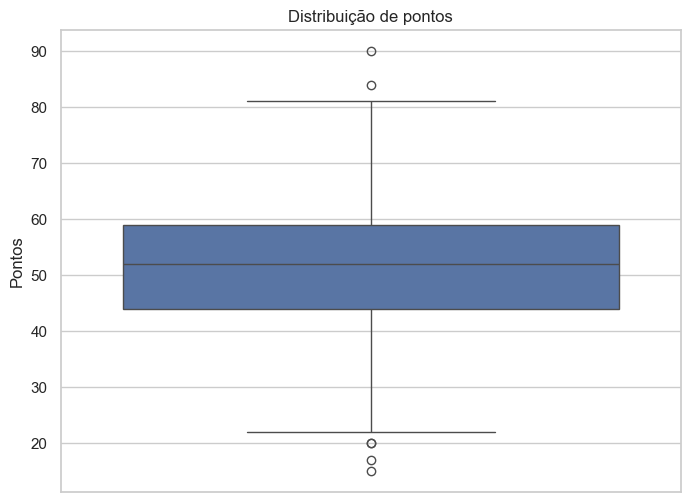

In [19]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y="Pontos", data=df)
plt.title("Distribuição de pontos")
plt.show()

Precisamos agora identificar tais outliers. Para isso iremos calcular os intervalos interquartis e os limites superior e inferior. Os limites são definidos como:
- Limite Inferior: Q1 - 1.5 * IQR
- Limite Superior: Q3 + 1.5 * IQR
Onde Q1 é o primeiro quartil, Q3 é o terceiro quartil e IQR é a amplitude interquartil (IQR = Q3 - Q1). Os valores que estão abaixo do limite inferior ou acima do limite superior são considerados outliers.

In [22]:
# Calcular Q1, Q3 e IQR
Q1 = df['Pontos'].quantile(0.25)
Q3 = df['Pontos'].quantile(0.75)
IQR = Q3 - Q1

# Limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os outliers
outliers = df[(df['Pontos'] < limite_inferior) | (df['Pontos'] > limite_superior)]
print(outliers)

     Temporada  Posicao              Time  Pontos  Saldo de Gols  Jogos  \
39        2007       20      América - RN      17            -56     38   
159       2013       20           Náutico      20            -57     38   
260       2019        1          Flamengo      90             49     38   
279       2019       20              Avaí      20            -44     38   
300       2021        1  Atlético Mineiro      84             33     38   
319       2021       20       Chapecoense      15            -40     38   

     Vitorias  Empates  Derrotas  Gols marcados  Gols sofridos  
39          4        5        29             24             80  
159         5        5        28             22             79  
260        28        6         4             86             37  
279         3       11        24             18             62  
300        26        6         6             67             34  
319         1       12        25             27             67  



Os maiores otliers do Brasileirão são:
- 2019 - Flamengo - 90 pontos
- 2021 - Atlético Mineiro - 84 pontos

Os menores otliers do Brasileirão são: 
- 2021 - Chapecoense - 15 pontos
- 2007 - América-RN - 17 pontos
- 2013 - Náutico - 20 pontos
- 2019 - Avaí - 20 pontos